# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
lat = []
long =[]
max_temp =[]
humidity =[]
clouds =[]
wind =[]
cntry = []
date =[] 

url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
print('Begin Data Retreival')
print('----------------------------')
for index , city in enumerate(cities, start=1):
    try:
        query_url = url + "appid=" + weather_api_key + '&units='+ units + "&q=" + city
        response = requests.get(query_url)
        print(f"Processing Weather Data  of {index} set | {city}")
        city_name.append(response.json()['name'])
        lat.append(response.json()['coord']['lat'])
        long.append(response.json()['coord']['lon'])
        max_temp.append(response.json()['main']['temp_max'])
        humidity.append(response.json()['main']['humidity'])
        clouds.append(response.json()['clouds']['all'])
        wind.append(response.json()['wind']['speed'])
        cntry.append(response.json()['sys']['country'])
        date.append(response.json()['dt'])
        
    except:
        print('City Not Found. Skipping to next city')
print('----------------------------')
print('End of Data Retrieval')
   
     
    

Begin Data Retreival
----------------------------
Processing Weather Data  of 1 set | cape town
Processing Weather Data  of 2 set | punta arenas
Processing Weather Data  of 3 set | nemuro
Processing Weather Data  of 4 set | hithadhoo
Processing Weather Data  of 5 set | atuona
Processing Weather Data  of 6 set | saldanha
Processing Weather Data  of 7 set | airai
Processing Weather Data  of 8 set | rikitea
Processing Weather Data  of 9 set | busselton
Processing Weather Data  of 10 set | kununurra
Processing Weather Data  of 11 set | mataura
Processing Weather Data  of 12 set | sentyabrskiy
City Not Found. Skipping to next city
Processing Weather Data  of 13 set | kharsawan
Processing Weather Data  of 14 set | port alfred
Processing Weather Data  of 15 set | qaanaaq
Processing Weather Data  of 16 set | hermanus
Processing Weather Data  of 17 set | hokitika
Processing Weather Data  of 18 set | hobart
Processing Weather Data  of 19 set | albany
Processing Weather Data  of 20 set | castro
P

Processing Weather Data  of 164 set | luwuk
Processing Weather Data  of 165 set | huazolotitlan
City Not Found. Skipping to next city
Processing Weather Data  of 166 set | mantua
Processing Weather Data  of 167 set | ahipara
Processing Weather Data  of 168 set | tessalit
Processing Weather Data  of 169 set | kaitangata
Processing Weather Data  of 170 set | lolua
City Not Found. Skipping to next city
Processing Weather Data  of 171 set | nikel
Processing Weather Data  of 172 set | axim
Processing Weather Data  of 173 set | wuwei
Processing Weather Data  of 174 set | kodiak
Processing Weather Data  of 175 set | marcona
City Not Found. Skipping to next city
Processing Weather Data  of 176 set | kavaratti
Processing Weather Data  of 177 set | kiunga
Processing Weather Data  of 178 set | sao miguel do oeste
City Not Found. Skipping to next city
Processing Weather Data  of 179 set | souillac
Processing Weather Data  of 180 set | talnakh
Processing Weather Data  of 181 set | vardo
Processing 

Processing Weather Data  of 322 set | kenai
Processing Weather Data  of 323 set | torbay
Processing Weather Data  of 324 set | gagarin
Processing Weather Data  of 325 set | bilma
Processing Weather Data  of 326 set | ontario
Processing Weather Data  of 327 set | saskylakh
Processing Weather Data  of 328 set | bilibino
Processing Weather Data  of 329 set | terrace bay
Processing Weather Data  of 330 set | laguna
Processing Weather Data  of 331 set | teahupoo
Processing Weather Data  of 332 set | saveh
Processing Weather Data  of 333 set | ambunti
Processing Weather Data  of 334 set | itarema
Processing Weather Data  of 335 set | tecoanapa
Processing Weather Data  of 336 set | tarakan
Processing Weather Data  of 337 set | zapolyarnyy
Processing Weather Data  of 338 set | grindavik
Processing Weather Data  of 339 set | atambua
Processing Weather Data  of 340 set | ulladulla
Processing Weather Data  of 341 set | amderma
City Not Found. Skipping to next city
Processing Weather Data  of 342 

Processing Weather Data  of 485 set | pangoa
Processing Weather Data  of 486 set | kamaishi
Processing Weather Data  of 487 set | lusambo
Processing Weather Data  of 488 set | sioni
Processing Weather Data  of 489 set | mocambique
City Not Found. Skipping to next city
Processing Weather Data  of 490 set | lasa
Processing Weather Data  of 491 set | ust-kuyga
Processing Weather Data  of 492 set | beira
Processing Weather Data  of 493 set | porto novo
Processing Weather Data  of 494 set | crab hill
City Not Found. Skipping to next city
Processing Weather Data  of 495 set | pasni
Processing Weather Data  of 496 set | goderich
Processing Weather Data  of 497 set | anloga
Processing Weather Data  of 498 set | belmopan
Processing Weather Data  of 499 set | meulaboh
Processing Weather Data  of 500 set | santa maria
Processing Weather Data  of 501 set | narasannapeta
Processing Weather Data  of 502 set | avera
Processing Weather Data  of 503 set | pedro ii
Processing Weather Data  of 504 set | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
df = pd.DataFrame({'City Name': city_name,
     'Lat':lat,
     'Lon': long,
     'Max Temperature': max_temp,
     'Humidity': humidity,
     'Cloudiness':clouds,
     'Wind Speed':wind,
     'Country':cntry,
     'Date':date})
df.set_index('City Name', inplace = True)
display(df)

,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City Name,,,,,,,,
Cape Town,-33.9258,18.4232,18.33,94,40,5.66,ZA,1618357306
Punta Arenas,-53.1500,-70.9167,10.00,87,100,4.12,CL,1618357341
Nemuro,43.3236,145.5750,11.00,87,75,1.54,JP,1618357398
Hithadhoo,-0.6000,73.0833,27.92,66,98,3.53,MV,1618357398
Atuona,-9.8000,-139.0333,27.35,73,50,7.80,PF,1618357398
...,...,...,...,...,...,...,...,...
Marabá,-5.3686,-49.1178,23.36,97,85,0.94,BR,1618357662
Quatre Cocos,-20.2078,57.7625,25.56,88,75,4.12,MU,1618357663
Aromashevo,56.8602,68.6375,5.10,91,58,5.70,RU,1618357663


In [22]:
df.to_csv(path_or_buf = output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
humid_af = df[df['Humidity']> 100 ]
humid_af

,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City Name,,,,,,,,


In [24]:
#  Get the indices of cities that have humidity over 100%.
display(humid_af)


,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City Name,,,,,,,,


In [25]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df[df['Humidity']<= 100]

In [26]:
display(clean_city_data)


,Lat,Lon,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City Name,,,,,,,,
Cape Town,-33.9258,18.4232,18.33,94,40,5.66,ZA,1618357306
Punta Arenas,-53.1500,-70.9167,10.00,87,100,4.12,CL,1618357341
Nemuro,43.3236,145.5750,11.00,87,75,1.54,JP,1618357398
Hithadhoo,-0.6000,73.0833,27.92,66,98,3.53,MV,1618357398
Atuona,-9.8000,-139.0333,27.35,73,50,7.80,PF,1618357398
...,...,...,...,...,...,...,...,...
Marabá,-5.3686,-49.1178,23.36,97,85,0.94,BR,1618357662
Quatre Cocos,-20.2078,57.7625,25.56,88,75,4.12,MU,1618357663
Aromashevo,56.8602,68.6375,5.10,91,58,5.70,RU,1618357663


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

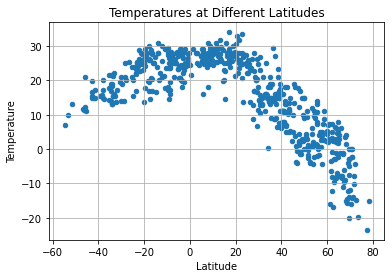

In [11]:
clean_city_data.plot.scatter(x = 'Lat' , y = 'Max Temperature', grid = True)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperatures at Different Latitudes');

## Latitude vs. Humidity Plot

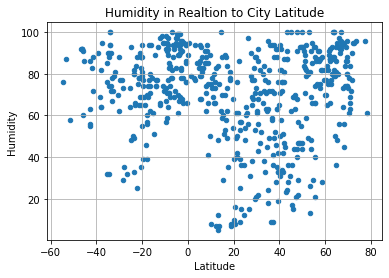

In [17]:
clean_city_data.plot.scatter(x = 'Lat' , y = 'Humidity', grid = True)
plt.xlabel('Latitude')
plt.title('Humidity in Realtion to City Latitude');

## Latitude vs. Cloudiness Plot

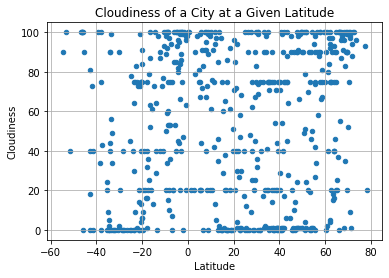

In [29]:
clean_city_data.plot.scatter(x = 'Lat' , y = 'Cloudiness', grid = True)
plt.xlabel('Latitude')
plt.title('Cloudiness of a City at a Given Latitude');

## Latitude vs. Wind Speed Plot

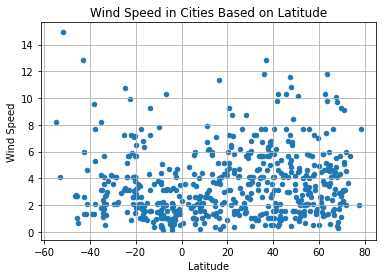

In [35]:
clean_city_data.plot.scatter(x = 'Lat' , y = 'Wind Speed', grid = True)
plt.xlabel('Latitude')
plt.title('Wind Speed in Cities Based on Latitude');

## Linear Regression

In [40]:
north = clean_city_data[clean_city_data['Lat']>=0]
south =  clean_city_data[clean_city_data['Lat']<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 0, 'Latitutde')

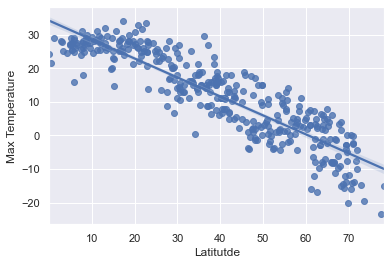

In [47]:
sns.set_theme(color_codes=True)
sns.regplot(x=north['Lat'], y = north['Max Temperature'])
plt.xlabel('Latitutde')
plt.title('')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression